In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [2]:
df = pd.read_csv("./dataset (missing + split)/train.csv", skipinitialspace=True)

In [3]:
# cat e' la lista dei nomi degli attributi categorici, num e' la lista dei nomi degli attributi numerici

cat = ['name','explicit','artists','album_name','key','mode','time_signature','genre','processing']
num = [col for col in df.columns if col not in cat] #list comprehension

Text(0.5, 0, 'genre')

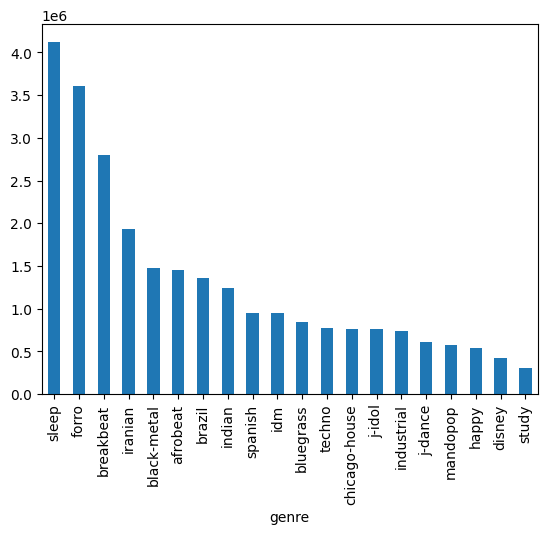

In [11]:
df.groupby('genre')['duration_ms'].max().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('genre')

# Distribution of the variables and statistics

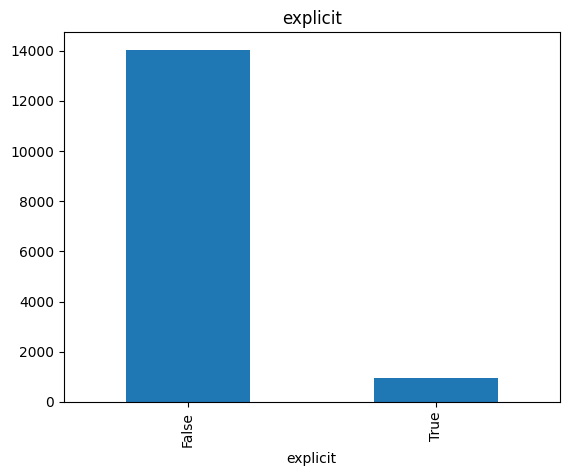

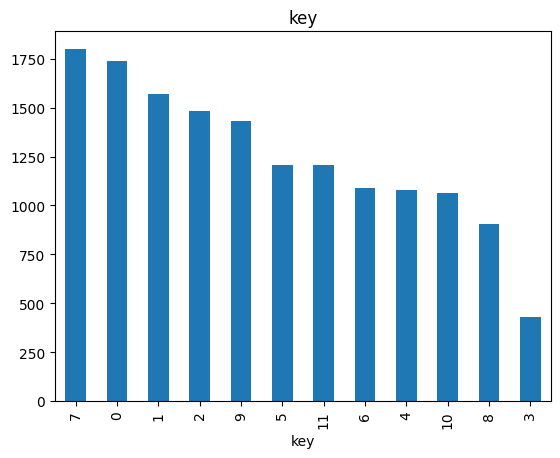

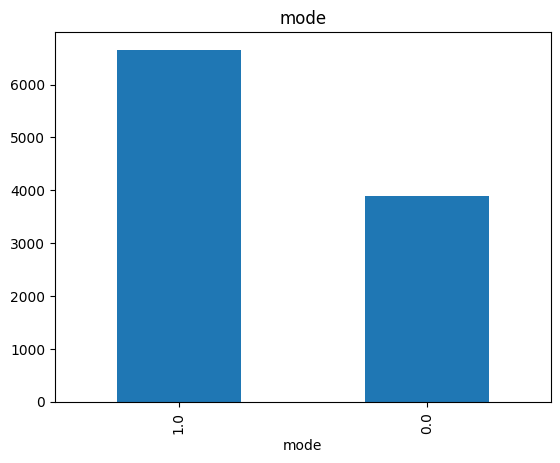

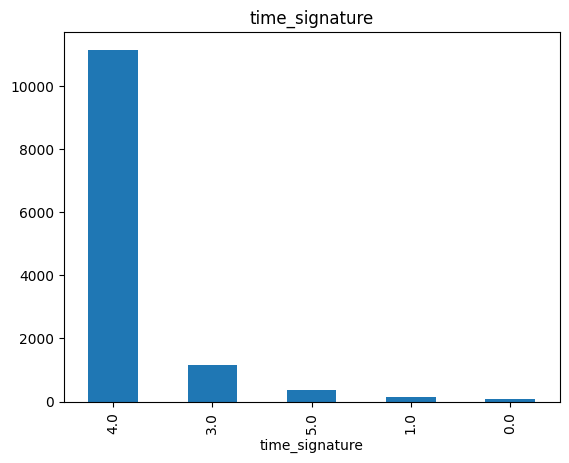

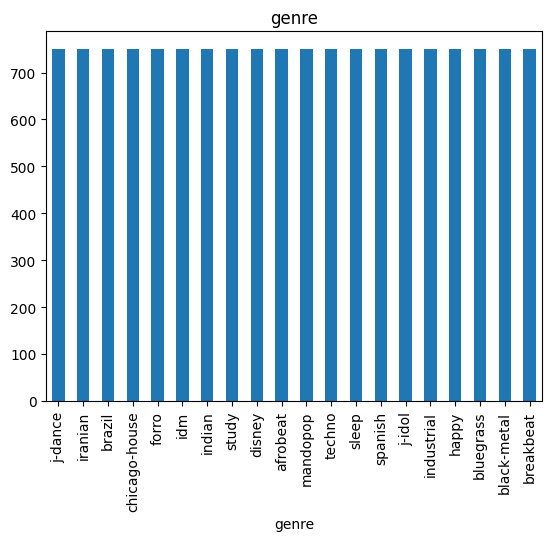

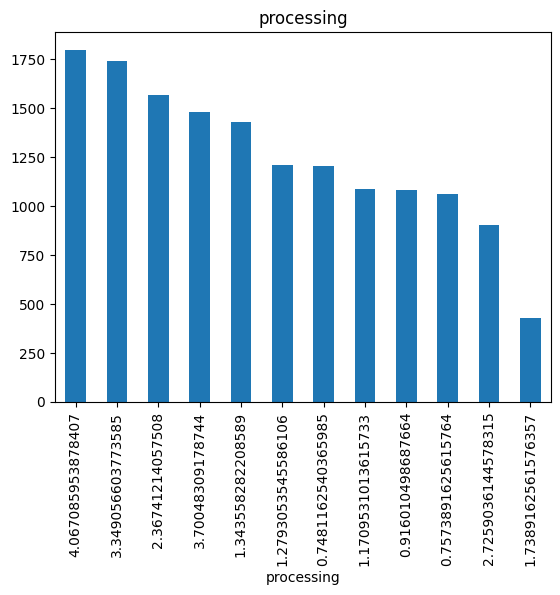

In [4]:
# bar chart per ogni attributo categorico

for col in cat:
    if col not in ['name','artists','album_name']:
        # questi 3^ sono esclusi perche' non ha senso calcolarne la frequenza

        #count = df[col].value_counts()
        #plt.bar(count.index, height=count.values)
        #plt.title(col)
        #plt.xticks(count.index, count.index, rotation=70)
        #plt.show()
        
        df[col].value_counts().plot(kind='bar', title=col)
        # ho creato i bar chart con pandas invece che matplotlib, vengono piu' "puliti"
        # + ordina le categorie dalla piu' frequente alla meno frequente
        
        plt.show()

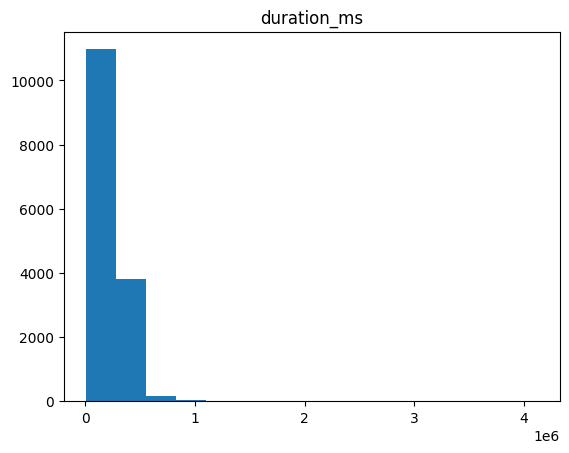

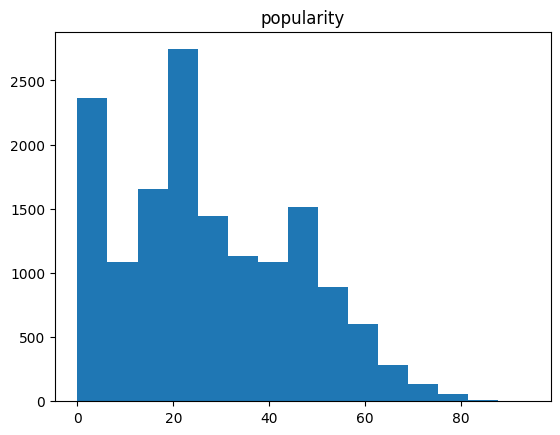

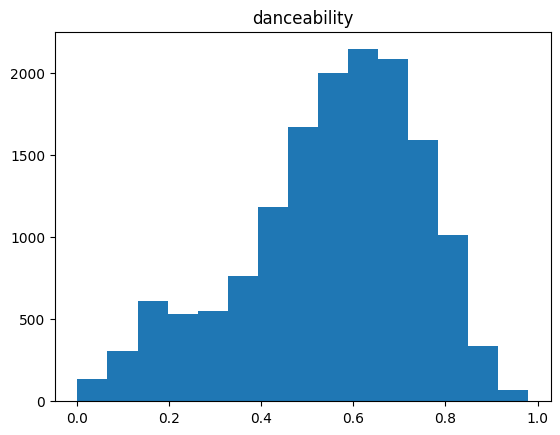

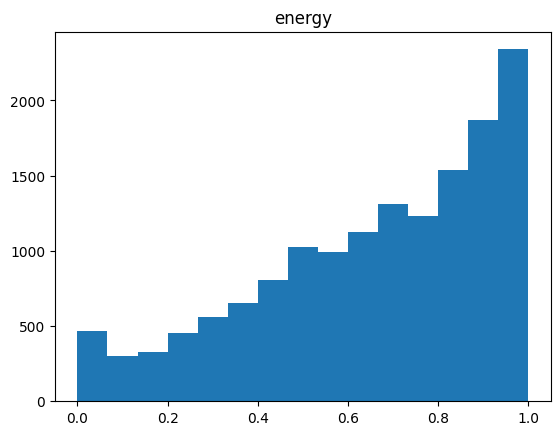

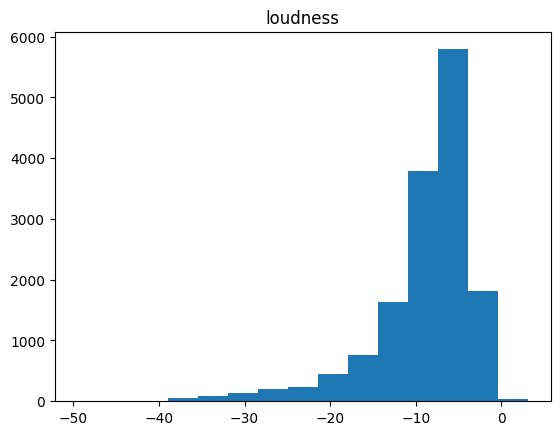

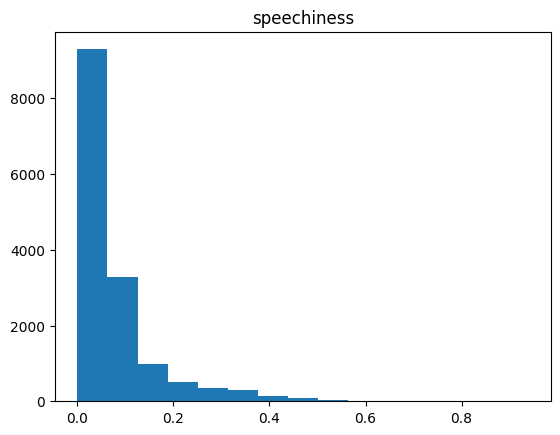

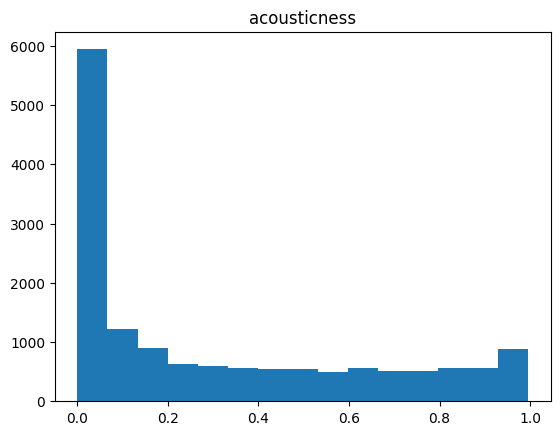

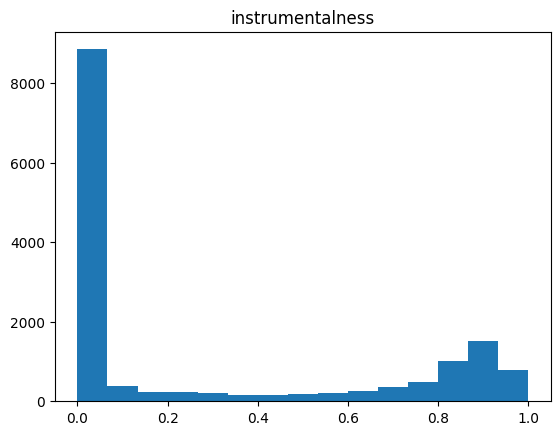

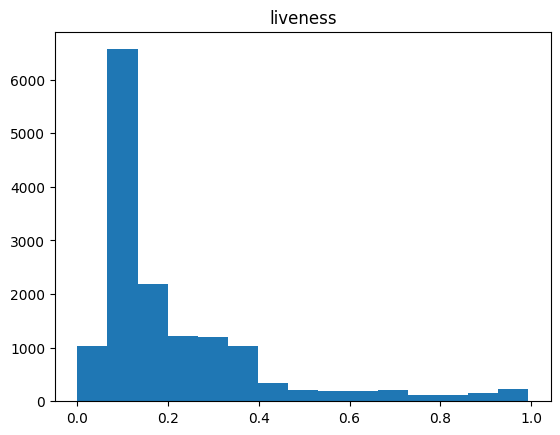

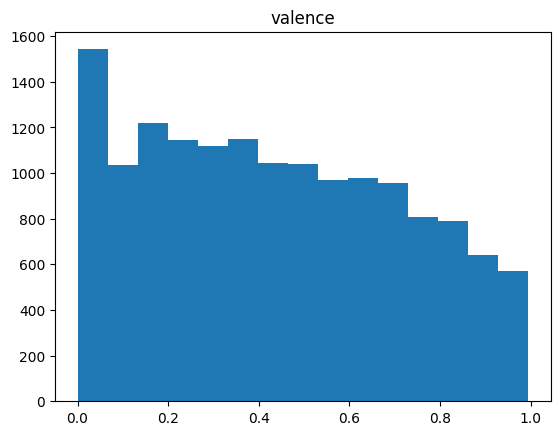

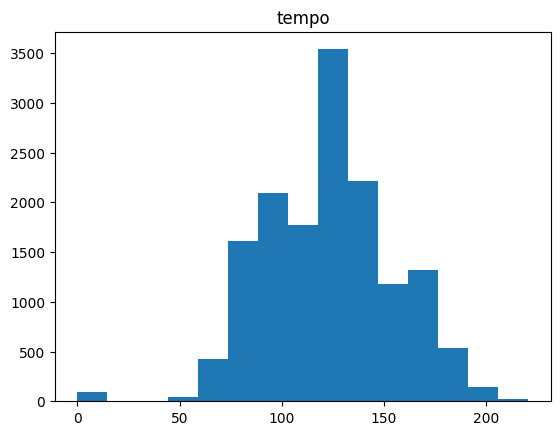

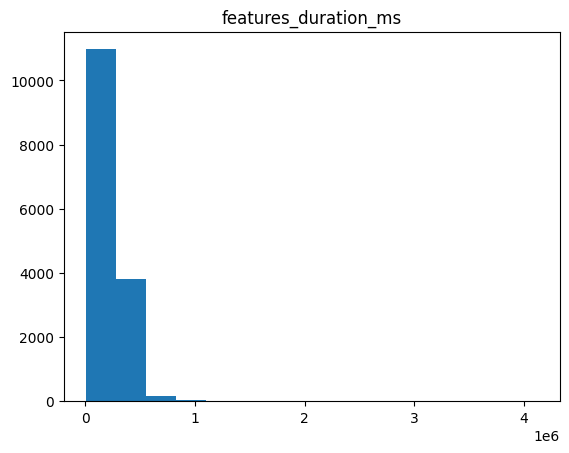

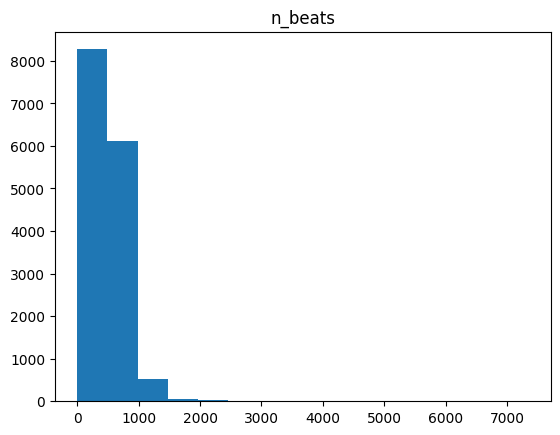

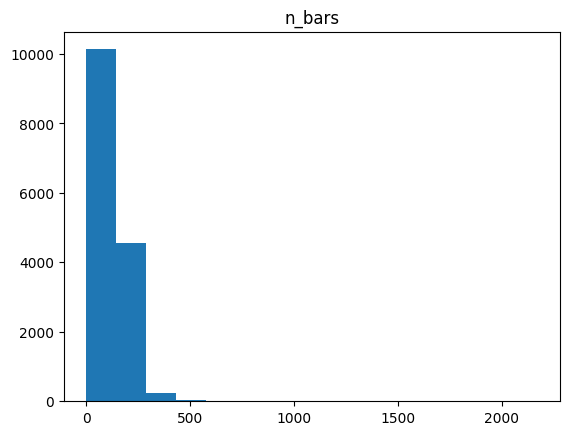

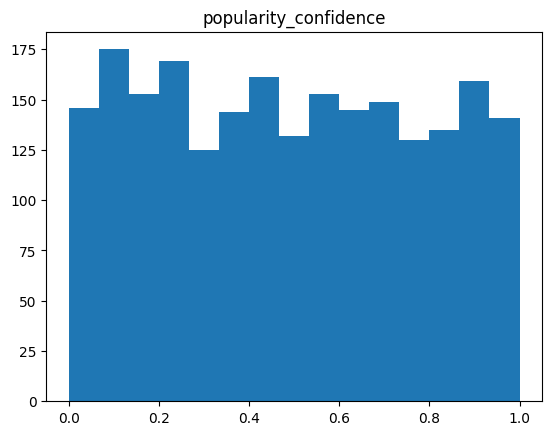

In [5]:
# histogram per ogni attributo numerico

# numero di bin calcolato con regola di sturges
log = math.log(df.shape[0], 2)
k = math.ceil(log) + 1

for col in num:
    #plt.hist(df[col], bins=k)
    #plt.title(col)
    #plt.xlabel(col)

    df.hist(bins=k, column=col, grid=False)
    # come sopra, uso pandas direttamente invece di matplotlib
    
    plt.show()   

Osservazioni:
1. Ci sono esattamente 750 brani per ogni genere musicale
2. La maggior parte delle canzoni è non-explicit
3. Le tre chiavi più frequentemente utilizzate sono (in ordine, convertendo alla notazione in lettere) G, C#, C
4. Le canzoni sono in gran parte in "major mode"
5. Usano per la maggior parte la stessa time signature (4.0)

La maggior parte degli attributi segue una distribuzione normale (left o right skewed).

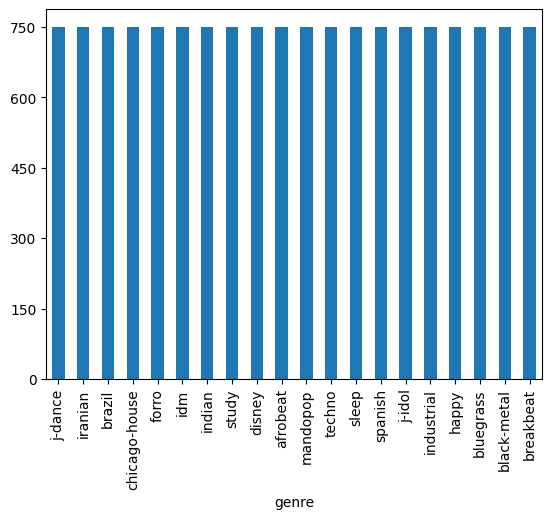

In [6]:
df['genre'].value_counts().plot(kind='bar')
plt.yticks(np.arange(0, 751, 150))
plt.savefig(fname='img/genre_distribution.png', dpi=300, bbox_inches='tight')

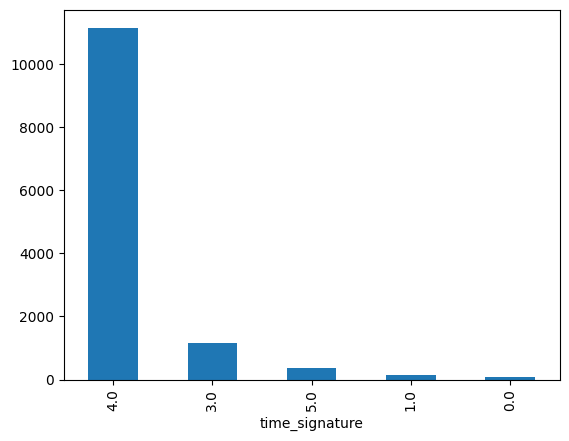

In [7]:
df['time_signature'].value_counts().plot(kind='bar')

plt.savefig(fname='img/timesig_distribution.png', dpi=300, bbox_inches='tight')

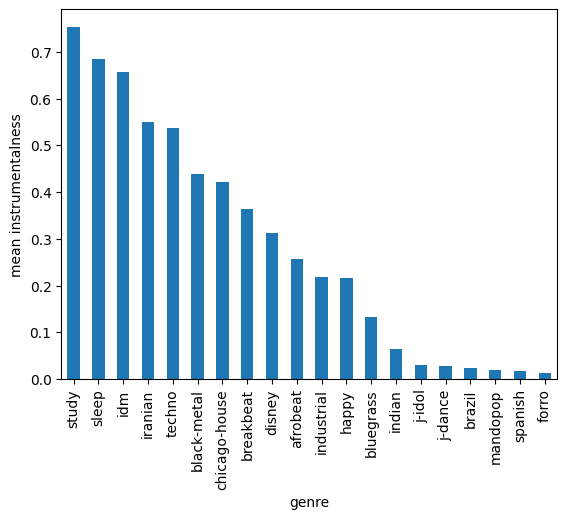

In [8]:
# popolarità media per genere

df.groupby('genre')['instrumentalness'].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('genre')
plt.ylabel('mean instrumentalness')

plt.savefig(fname='img/genre_instrumentalness.png', dpi=300, bbox_inches='tight')

plt.show()

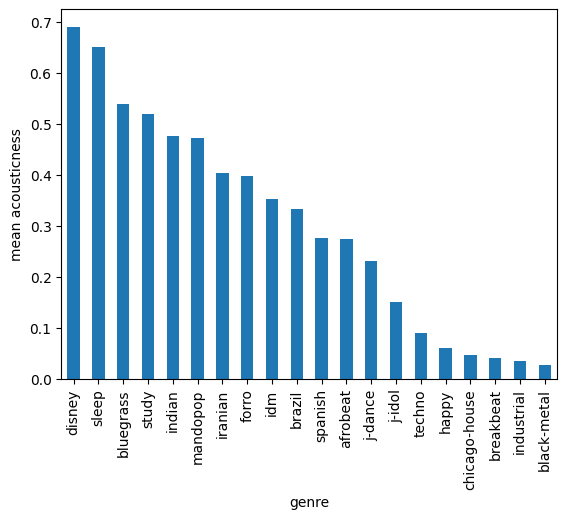

In [9]:
# danceability media per genere

df.groupby('genre')['acousticness'].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('genre')
plt.ylabel('mean acousticness')

plt.savefig(fname='img/genre_acousticness.png', dpi=300, bbox_inches='tight')

plt.show()

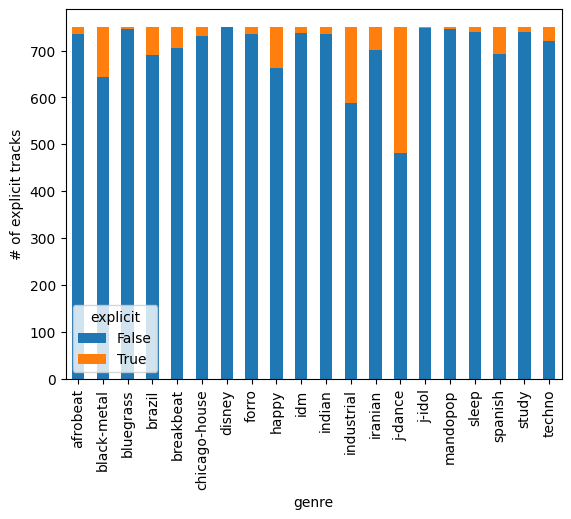

In [10]:
# explicit per genre

pd.crosstab(df['genre'], df['explicit']).plot(kind='bar', stacked=True)

plt.xlabel('genre')
plt.ylabel('# of explicit tracks')

plt.savefig(fname='img/explicit_per_genre.png', dpi=300, bbox_inches='tight')

plt.show()

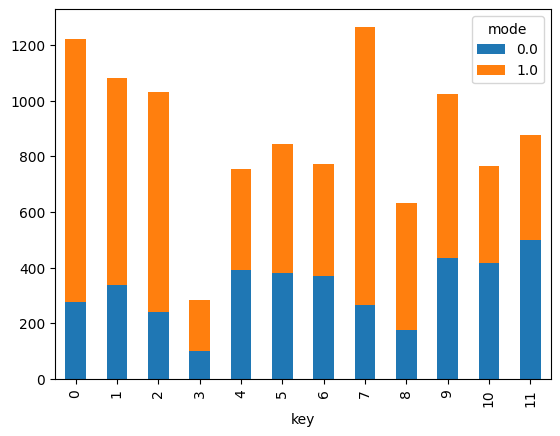

In [11]:
# mode per key

pd.crosstab(df['key'], df['mode']).plot(kind='bar', stacked='True')

plt.savefig(fname='img/mode_per_key.png', dpi=300, bbox_inches='tight')

plt.show()

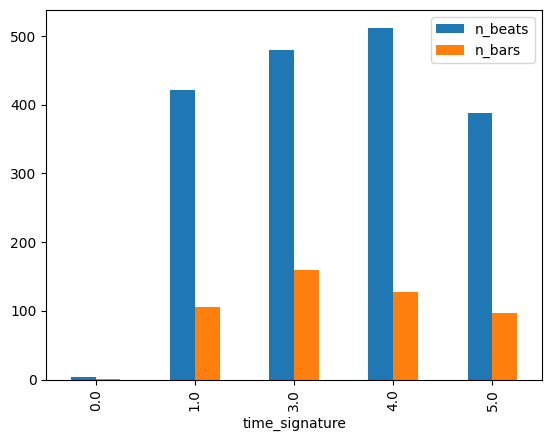

In [12]:
df.groupby('time_signature')[['n_beats', 'n_bars']].mean().plot(kind='bar')

plt.savefig(fname='img/n_beats_n_bars.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
df[df['time_signature'] == 1.0]

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
57,Blow the Man Down,117906,False,42,Mickey Mouse;The Gooey Fish,Mickey Mouse Clubhouse,0.725,0.552,2,-9.030,...,0.101,0.97500,97.624,117907,1.0,186.0,46.0,NaN,3.700483,disney
129,Baadaabaad,290000,False,0,Rojin Sharafi,Zangaar,0.400,0.415,7,-13.288,...,0.111,0.03830,88.553,290000,1.0,423.0,107.0,0.146,4.067086,iranian
399,The World of the LSD-User,238608,False,25,Juggernaut,The World of the LSD-User,0.427,0.910,6,-9.822,...,0.126,0.37900,164.840,238608,1.0,647.0,164.0,NaN,1.170953,happy
696,Transport,132744,False,31,White Noise Baby Sleep,"! !""#Reboot#""! !",0.161,0.962,10,-21.869,...,0.202,0.00655,129.087,132744,1.0,282.0,71.0,NaN,0.757389,sleep
822,Experience,322120,False,5,Alphaxone,Ghost Machine,0.094,0.152,7,-23.682,...,0.115,0.03570,86.377,322120,1.0,456.0,114.0,NaN,4.067086,iranian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14008,Tyranni,233439,True,16,Avslut,Tyranni,0.252,0.985,4,-6.876,...,0.321,0.03970,119.967,233440,1.0,428.0,108.0,NaN,0.916010,black-metal
14073,Feel It,161985,True,0,Teejay,Feel It,0.552,0.570,11,-6.481,...,0.124,0.28100,76.620,161985,1.0,204.0,51.0,NaN,0.748116,j-dance
14135,Hairdryer Sound for Sleep,168250,False,54,Pink Noise;Sleepy Times,Soothing Hum: Pink Noise,0.155,0.528,1,-20.523,...,0.112,0.02360,82.845,168250,1.0,229.0,56.0,0.598,2.367412,sleep
14185,Matkar Maya Ko Ahankar,365672,False,54,Kabir Cafe,Panchrang,0.796,0.517,1,-6.289,...,0.138,0.61400,107.475,365673,1.0,649.0,162.0,NaN,2.367412,indian


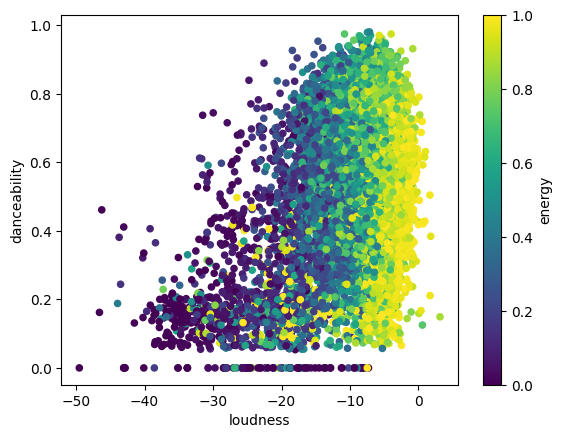

In [14]:
# loudness, danceability ed energy

df.plot.scatter(x='loudness', y='danceability', c='energy')

plt.savefig(fname='img/loudness_danceability_energy.png', dpi=300, bbox_inches='tight')

plt.show()

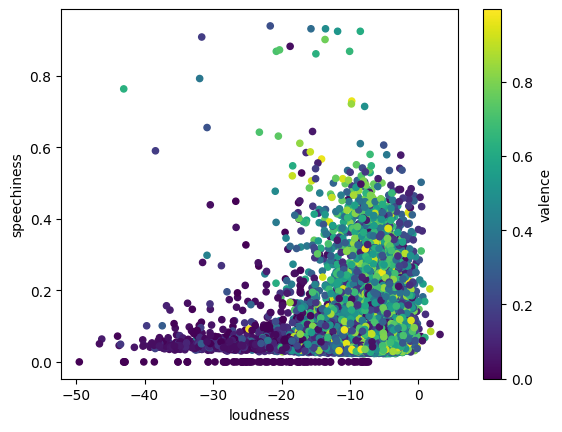

In [15]:
# loudness, speechiness e valence

df.plot.scatter(x='loudness', y='speechiness', c='valence')

plt.savefig(fname='img/loudness_speechiness_valence.png', dpi=300, bbox_inches='tight')

plt.show()

# Assessing data quality

### Missing values

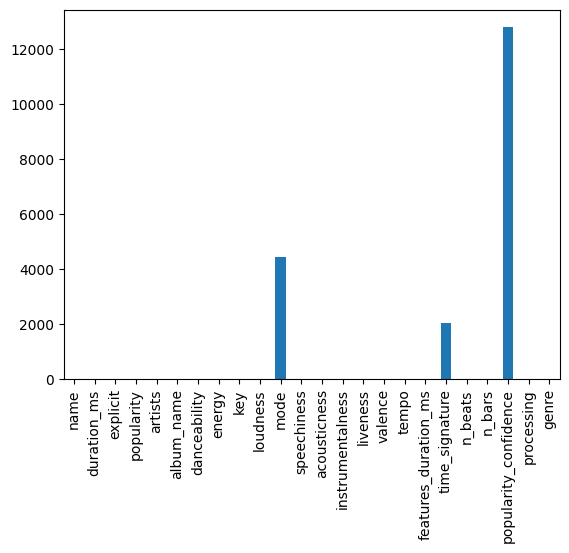

name 0
duration_ms 0
explicit 0
popularity 0
artists 0
album_name 0
danceability 0
energy 0
key 0
loudness 0
mode 4450
speechiness 0
acousticness 0
instrumentalness 0
liveness 0
valence 0
tempo 0
features_duration_ms 0
time_signature 2062
n_beats 0
n_bars 0
popularity_confidence 12783
processing 0
genre 0


In [16]:
# bar chart che mostra il numero di valori null per ogni attributo
# la stampa subito sotto specifica il numero preciso

df.isna().sum().plot(kind='bar')
plt.yticks(np.arange(0,14000,2000))
plt.savefig(fname='img/missing_before.png', dpi=300, bbox_inches='tight')

plt.show()

for col in df.columns:
    print(col, df[col].isna().sum())

Ci sono valori mancanti per tre attributi: mode, time_signature e popularity_confidence

- time_signature si può in realtà approssimare usando il rapporto tra n_beats e n_bars.
- popularity_confidence si rimuove perché ha troppi missing values.
- i valori mancanti di mode vengono sostituiti in base alla chiave della canzone; in particolare con la mode più freuentemente usata per la chiave (es. C major (do maggiore) è la scala musicale più frequentemente usata, ha senso pensare che se una canzone è in do probabilmente sarà in do maggiore)

In [17]:
# riempire time_signature
timesig = round((df['n_beats'] / (df['n_bars']))).fillna(0)
timesig.value_counts()
df['time_signature'].fillna(value=timesig, inplace=True)

df['time_signature'].isna().sum() # controllo che sia andato tutto bene

0

In [18]:
# riempire mode
df['mode'].fillna(df.groupby('key')['mode'].transform(lambda x: x.mode()[0]), inplace=True)

df['mode'].isna().sum() # controllo che sia andato tutto bene

0

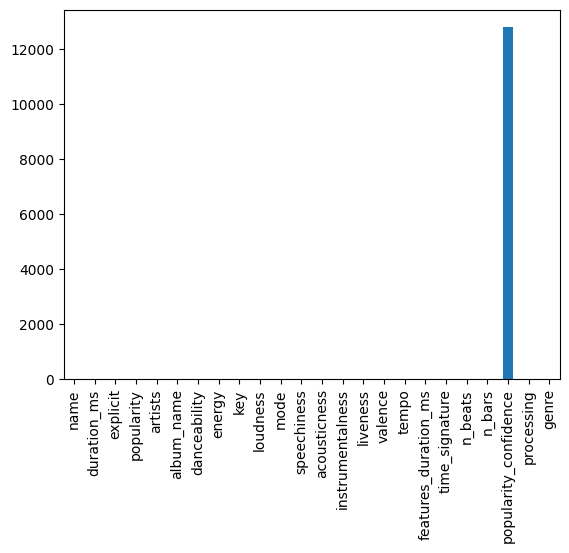

name 0
duration_ms 0
explicit 0
popularity 0
artists 0
album_name 0
danceability 0
energy 0
key 0
loudness 0
mode 0
speechiness 0
acousticness 0
instrumentalness 0
liveness 0
valence 0
tempo 0
features_duration_ms 0
time_signature 0
n_beats 0
n_bars 0
popularity_confidence 12783
processing 0
genre 0


In [19]:
# ricontrollo i valori mancanti

df.isna().sum().plot(kind='bar')

plt.savefig(fname='img/missing_after.png', dpi=300, bbox_inches='tight')
plt.yticks(np.arange(0,14000,2000))
plt.show()

for col in df.columns:
    print(col, df[col].isna().sum())

### Outliers

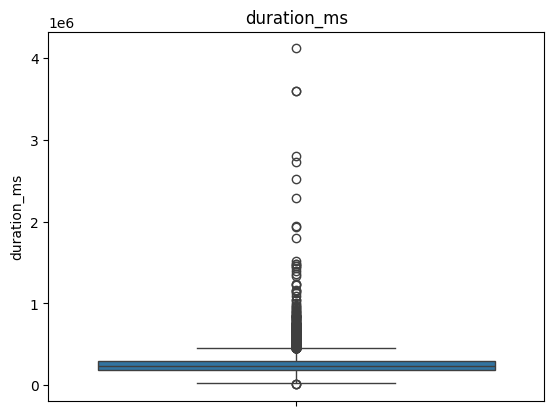

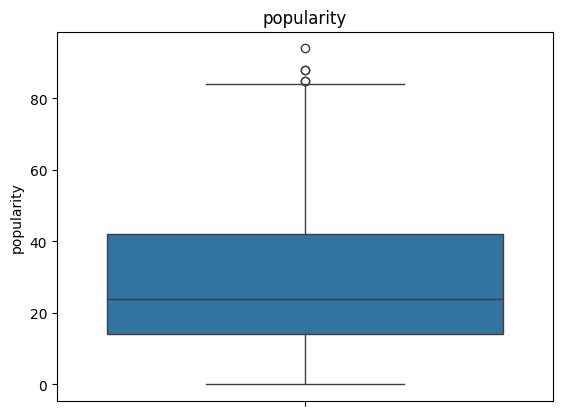

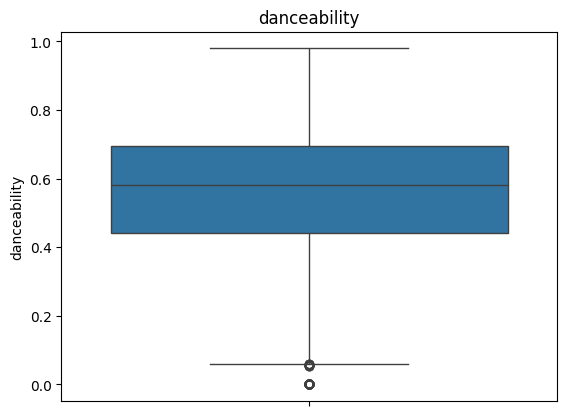

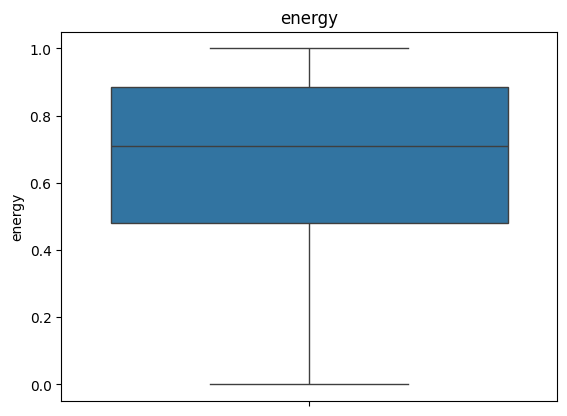

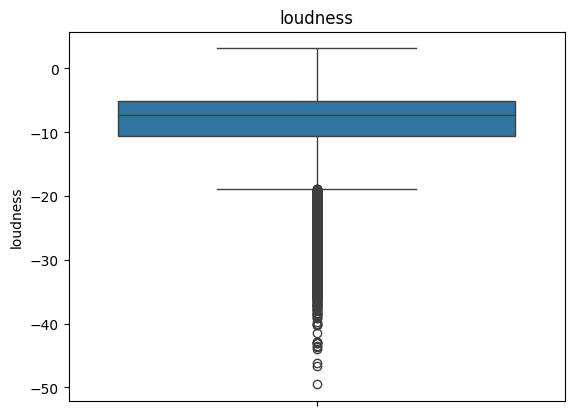

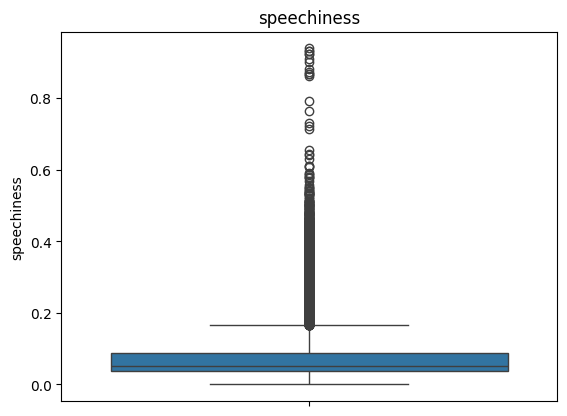

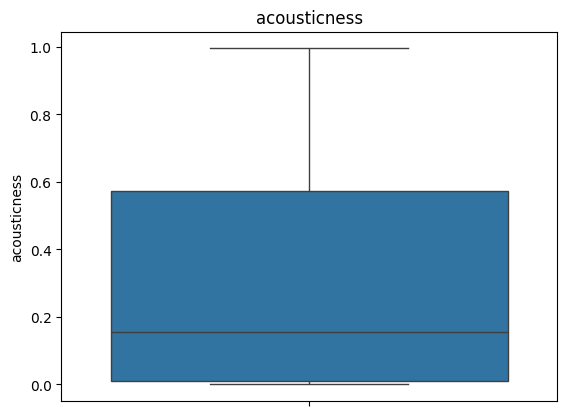

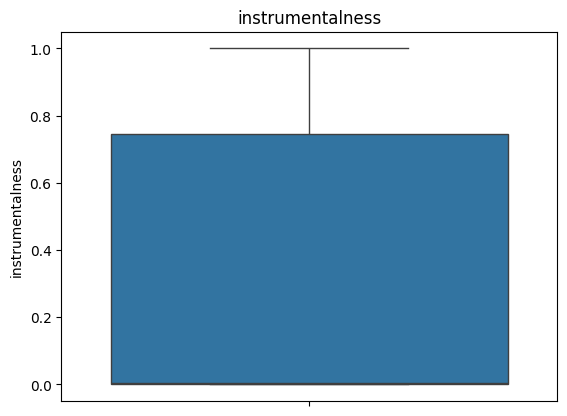

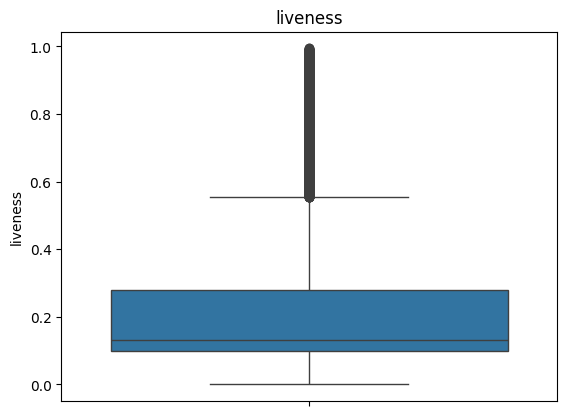

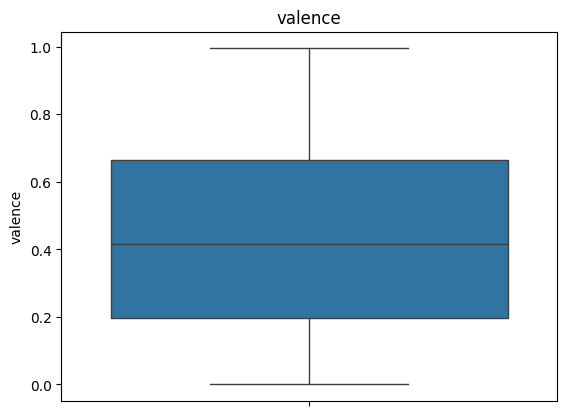

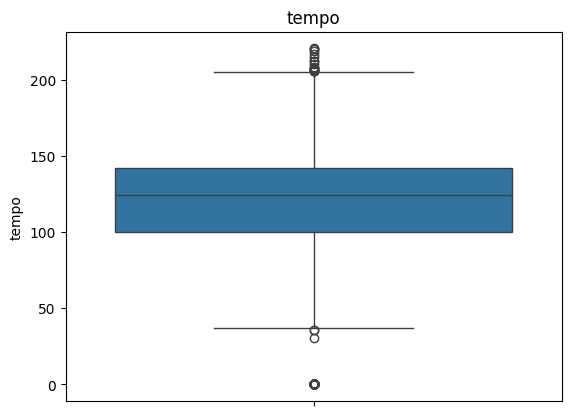

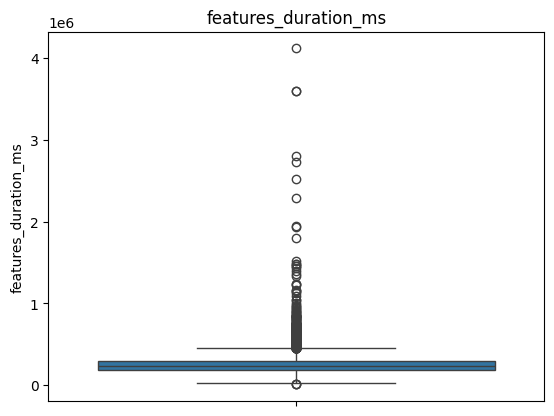

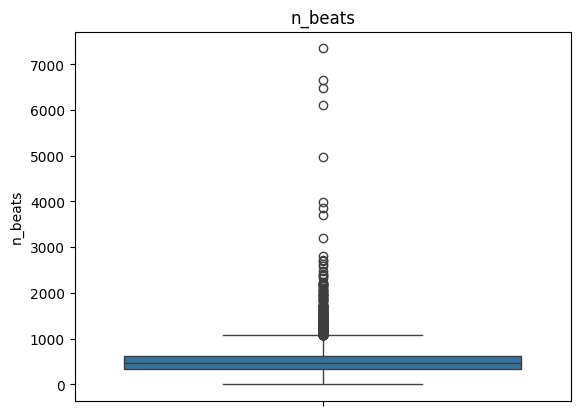

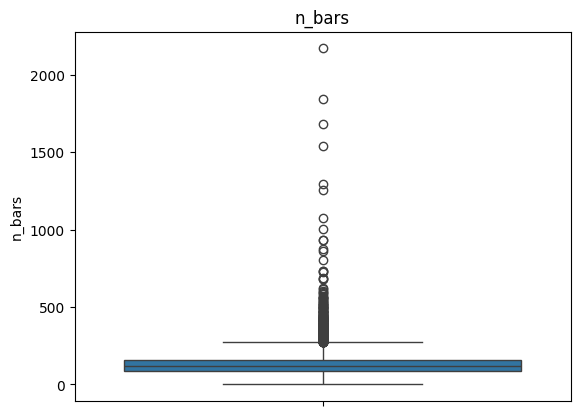

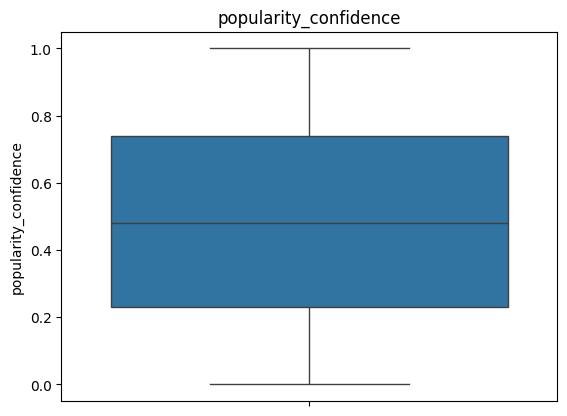

In [20]:
for col in num:
    sns.boxplot(df[col])
    plt.title(col)
    plt.ylabel(col)
    plt.show()

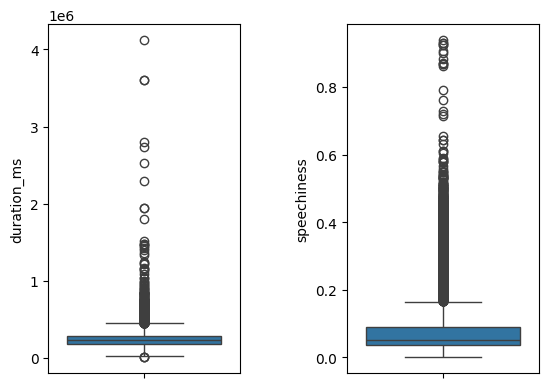

In [21]:
fig, axs = plt.subplots(1,2)

sns.boxplot(df['duration_ms'], ax=axs[0])

sns.boxplot(df['speechiness'], ax=axs[1])

plt.tight_layout(pad=4)
plt.savefig(fname='img/outliers.png', dpi=300, bbox_inches='tight')

Variabili che hanno outliers:

- duration_ms
- speechiness
- loudness

In [22]:
col = 'duration_ms'
t = 10
iqr = df[col].quantile(.75) - df[col].quantile(.25)
pos_thresh = df[col].quantile(.5) + t*iqr
neg_thresh = df[col].quantile(.5) - t*iqr

In [23]:
print(len(df[df[col] <= neg_thresh][col]))
df[df[col] <= neg_thresh][[col, 'name']]

0


,duration_ms,name


In [24]:
print(len(df[df[col] >= pos_thresh][col]))
df[df[col] >= pos_thresh][[col, 'name']]

19


,duration_ms,name
375,1331839,inherited heteronomous perception
1376,1800000,Box Fan on High
2057,1455781,"Floden, som kan skabe"
3288,2733257,Welcome To The Jungle - Continuous DJ Mix Pt. 1
6203,1478618,Fra dyden
6313,1357451,Tu És o Centro (Ao Vivo)
6401,4120258,Ocean Waves Sounds
7341,2287542,Welcome To The Jungle Vol. 2 - Continuous DJ M...
8580,3600014,Electric Fan (Sound Masking Fan)
8698,1457998,Cantos Gregorianos Sanadores


In [25]:
col = 'speechiness'
t = 10
iqr = df[col].quantile(.75) - df[col].quantile(.25)
pos_thresh = df[col].quantile(.5) + t*iqr
neg_thresh = df[col].quantile(.5) - t*iqr

In [26]:
print(len(df[df[col] <= neg_thresh][col]))
df[df[col] <= neg_thresh][[col, 'name']]

0


,speechiness,name


In [27]:
print(len(df[df[col] >= pos_thresh][col]))
df[df[col] >= pos_thresh][[col, 'name']]

31


,speechiness,name
690,0.610,Canoeiro (vinheta)
1029,0.611,Music in Your Soup
1405,0.868,O Que Separa os Homens dos Meninos
1425,0.644,"Autonom III, Op. 10"
2117,0.655,Nabard
2271,0.939,yami wa hikari no haha
2573,0.868,Fractura de escafoides tarsiano derecho - Cara B
2776,0.931,Mortimer
2882,0.729,Anoroc
3580,0.763,Sonidos de Aves


# Variable transformations

Variabili da trasformare: ?

# Pairwise correlations and eventual elimination of variables

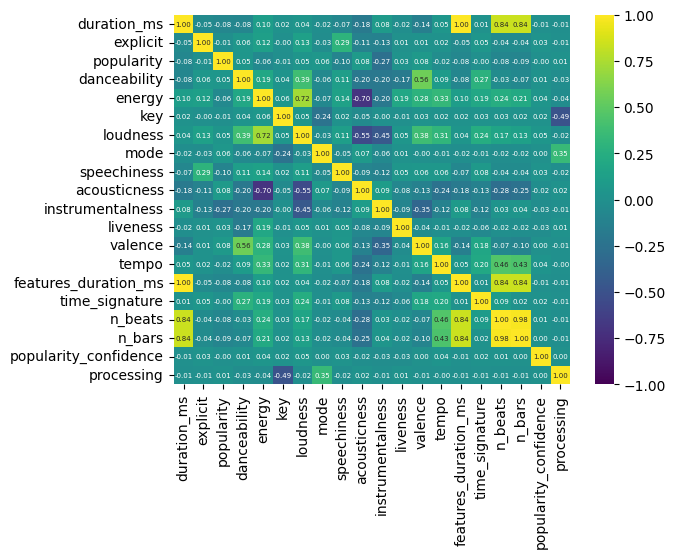

In [28]:
# correlazione studiata con seaborn, sempre perche' matplotlib e' troppo macchinoso per quello che serve fare

# heatmap con la correlazione tra tutti gli attributi numerici
sns.heatmap(data=df.corr(numeric_only=True), vmin=-1.0, vmax=1.0, annot=True, annot_kws={"fontsize":5}, fmt='.2f', cmap='viridis')

plt.savefig(fname='img/correlation_matrix_before.png', dpi=300, bbox_inches='tight')
plt.show()

Si rimuovono tutte quelle con correlazione > 0.70 o < - 0.70;
In più anche popularity_confidence per il motivo di cui sopra e processing, i cui valori combaciano sempre con quelli di key

In [30]:
df.drop(columns=['features_duration_ms','n_bars','n_beats','popularity_confidence','processing','acousticness','loudness'], inplace=True)

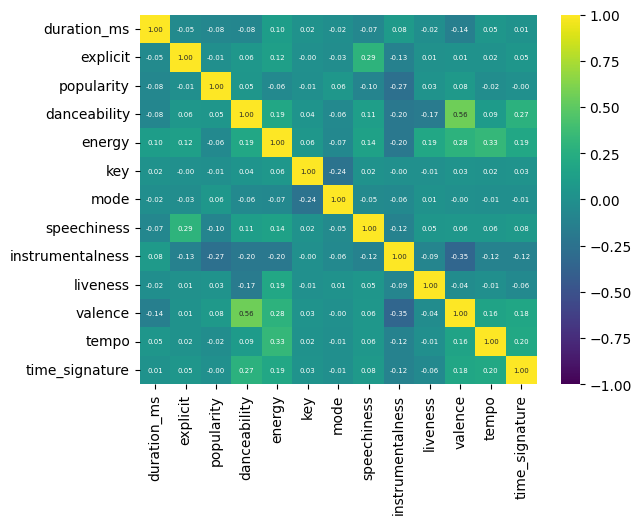

In [31]:
sns.heatmap(data=df.corr(numeric_only=True), vmin=-1.0, vmax=1.0, annot=True, annot_kws={"fontsize":5}, fmt='.2f', cmap='viridis')
plt.savefig(fname='img/correlation_matrix_after.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
df.drop(df[df['duration_ms'] >= 1331839].index, inplace = True)
df.drop(df[df['speechiness'] >= 0.567].index, inplace = True)

df.to_csv("./processed.csv", index=False)